## TODO
- implement the time-dependent origin

In [65]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pyEXP
import gala.potential as gp
from gala.units import SimulationUnitSystem, galactic
import gala.dynamics as gd
import EXPtools

In [2]:
exp_units = SimulationUnitSystem(mass=1e10 * u.Msun, length=1 * u.kpc, G=1)

In [120]:
mw_origin = np.loadtxt('MW_100M_beta1_vir_OM3_G4_pb_bulge_pot.txt')

In [122]:
mw_origin.shape

(258, 3)

In [130]:
MW_exp_pot = gp.EXPPotential(
    units=exp_units,
    config_file="./GC21_MW.yaml",
    coef_file = "../GC21/coefficients/coefs_GC21_MW_DM_halo_10_8.h5",
    snapshot_index=0
)

---- SLGridSph::ReadH5Cache: successfully read basis cache <cache_GC21_MW_DM_halo_10_8.h5>
---- Spherical::orthoTest: worst=0.121785


In [125]:
MW_composite = gp.CCompositePotential()
MW_composite['halo'] = MW_exp_pot
MW_composite['disk'] = gp.MN3ExponentialDiskPotential(m=5.78e10*u.Msun, h_R=2.4*u.kpc, h_z=0.5*u.kpc, units=exp_units)
MW_composite['bulge'] = gp.HernquistPotential(m=1.4e10*u.Msun, c=0.7*u.kpc, units=exp_units)


In [101]:
sim_test_particle = np.loadtxt('test_MW_orbit.txt')
sim_time = np.arange(0, len(sim_test_particle[:,0])*0.02, 0.02)

In [74]:
w0 = gd.PhaseSpacePosition(
    pos=[ -8.13596344,  68.09912872, -16.11926651] * u.kpc,
    vel=[  6.75677538, -74.71125031, -93.4519577 ] * u.km / u.s,
)
orbit = gp.Hamiltonian(MW_exp_pot).integrate_orbit(w0, dt=1 * u.Myr, t1=0*u.Gyr, t2=2.2*u.Gyr)

In [117]:
orbit_composite = gp.Hamiltonian(MW_composite).integrate_orbit(w0, dt=1 * u.Myr, t1=0*u.Gyr, t2=2.2*u.Gyr)

In [118]:
orb_distance = np.linalg.norm(orbit.xyz.to(u.kpc).value, axis=0)
orb_comp_distance = np.linalg.norm(orbit_composite.xyz.to(u.kpc).value, axis=0)
orb_sim_distance = np.linalg.norm(sim_test_particle[:,:3], axis=1)

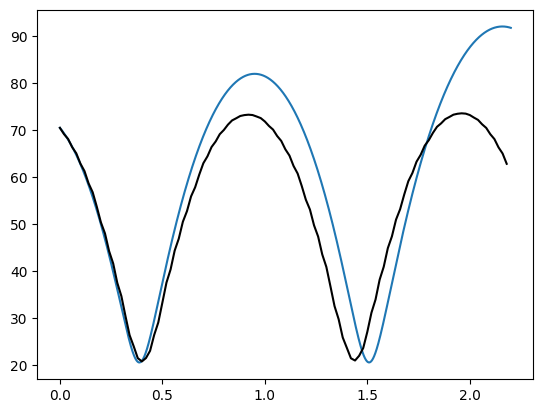

In [128]:
#plt.plot(orbit.t.to(u.Gyr), orb_distance, ls=':')
plt.plot(orbit_composite.t.to(u.Gyr), orb_comp_distance, ls='-', c='C0')
plt.plot(sim_time, orb_sim_distance, c='k')

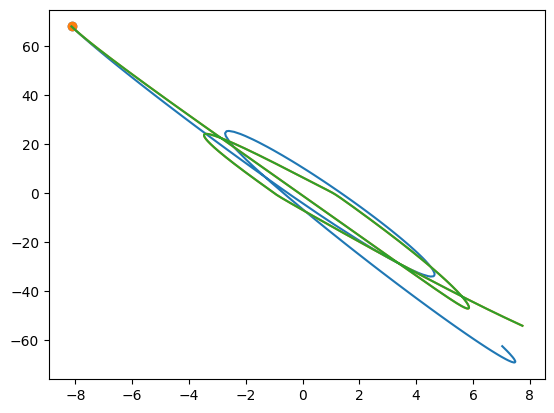

In [76]:

plt.plot(sim_test_particle[:,0], sim_test_particle[:,1])
plt.plot(orbit.x.to(u.kpc), orbit.y.to(u.kpc))
plt.plot(orbit_composite.x.to(u.kpc), orbit_composite.y.to(u.kpc))

plt.scatter(orbit.x[0].to(u.kpc), orbit.y[0].to(u.kpc))
plt.scatter(sim_test_particle[0,0], sim_test_particle[0,1])